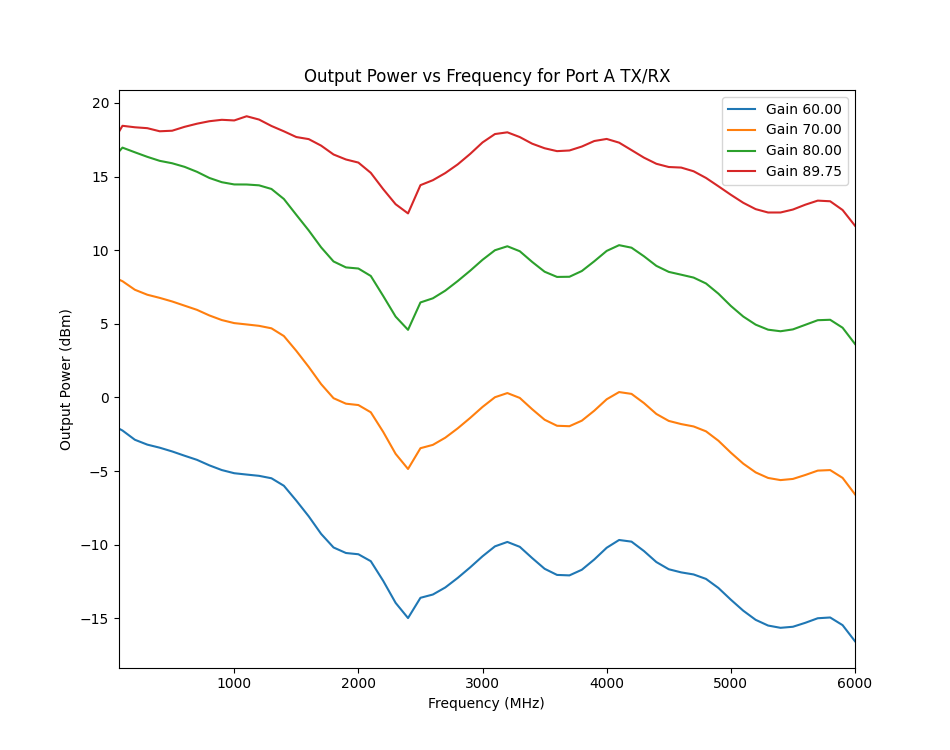

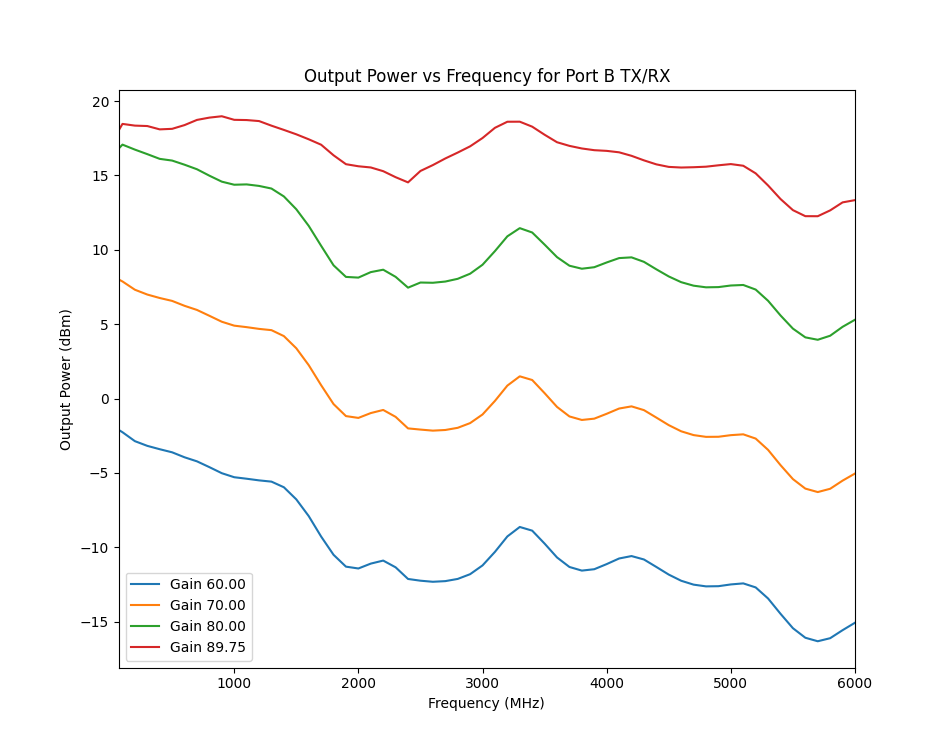

In [1]:
%matplotlib widget

import os
import sys
import statistics

import matplotlib.pyplot

from ldb.hdf5.high_level import HDF5File
from ldb.hdf5._hdf5 import lib as hdf5_lib

def make_fig(width=9.5, height=7.5):
    return matplotlib.pyplot.figure(figsize=(width, height))

def make_xy_ax(fig, title, ylabel, xmin, xmax):
    ax = fig.add_subplot(1,1,1)
    ax.set_xlabel('Frequency (MHz)')
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    if xmin is not None and xmax is not None:
        ax.set_xlim(left=xmin, right=xmax)
    return ax


ports = [(0, "TX/RX", "A TX/RX"),
         (1, "TX/RX", "B TX/RX")]


# More info at https://gitlab.flux.utah.edu/alex_orange/sdr-calibration-scripts/blob/master/noise_figure.py

calibration_filename = "/calibration-data/out_317371C_.h5"
if os.path.exists(calibration_filename):
    with HDF5File.open(calibration_filename, read_only=True) as data_file:
        # Indices are (port, frequency, gain, measurement (10 individual pieces of data))
        with data_file.open_dataset('gain_subset_sweep_dataset') as dataset:
            data = dataset[...]
            
            frequencies = [70e6] + [100e6*i for i in range(1, 61)]
            frequencies = [frequency/1e6 for frequency in frequencies]
            gain_subset = [0, 10, 20, 30, 40, 50, 60, 70] + \
                [70+0.25*i for i in range(1, 80)]

            
            for i, port in zip(range(data.size[0]), ports):
                curves = []
                curve_errors = []
                for k in range(data.size[2]):
                    curve = []
                    curve_error = []
                    for j in range(data.size[1]):
                        curve.append(dataset[i, j, k])
                    curves.append(curve)

                fig = make_fig()
                ax = make_xy_ax(fig, 'Output Power vs Frequency for Port %s'%(port[2]),
                                'Output Power (dBm)', frequencies[0], frequencies[-1])
                
                for curve, gain in zip(curves, gain_subset):
                    if gain in [60,70,80,89.75]:
                        ax.plot(frequencies, curve, label="Gain %.2f"%(gain))
                    
                ax.legend()
            
else:
    print("File doesn't exist")

In [2]:
len(curves)

87

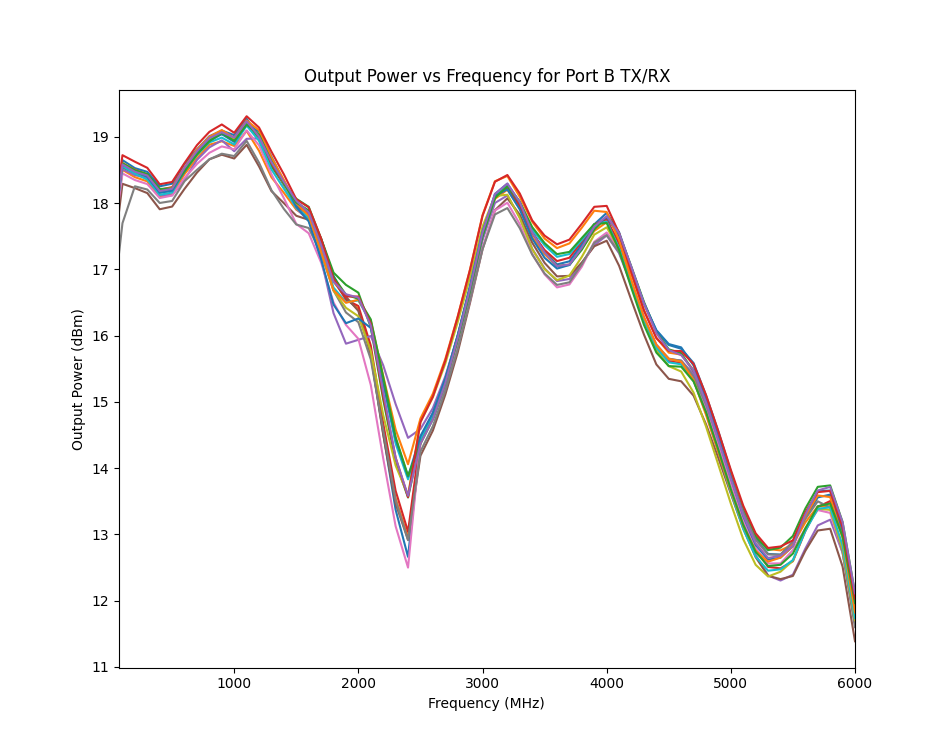

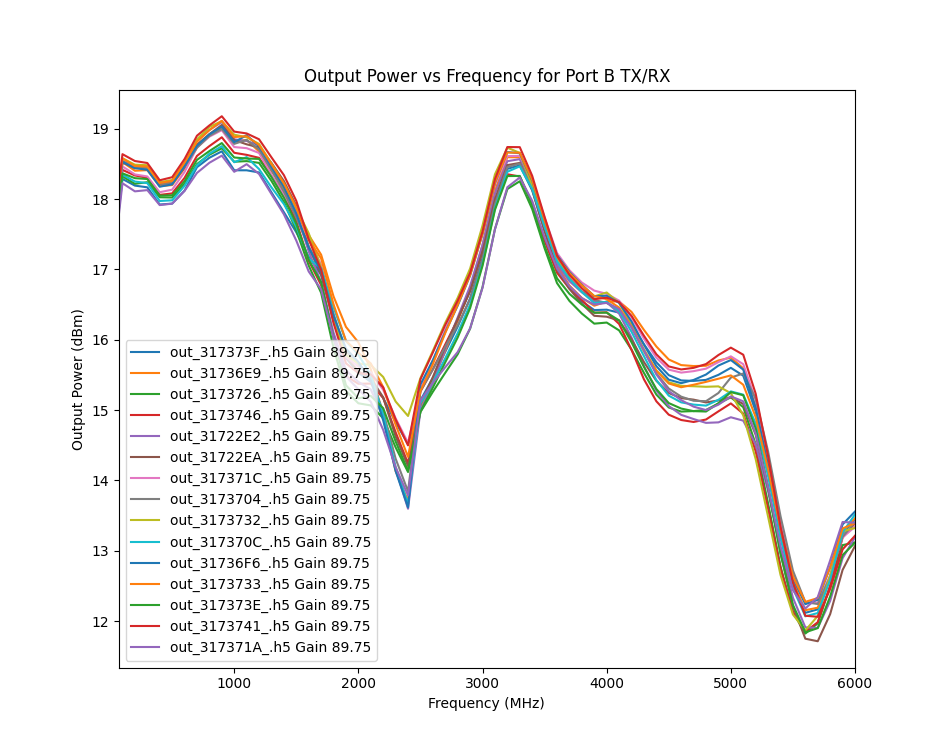

In [3]:
%matplotlib widget

import os
import sys
import statistics

import matplotlib.pyplot

from ldb.hdf5.high_level import HDF5File
from ldb.hdf5._hdf5 import lib as hdf5_lib

def make_fig(width=9.5, height=7.5):
    return matplotlib.pyplot.figure(figsize=(width, height))

def make_xy_ax(fig, title, ylabel, xmin, xmax):
    ax = fig.add_subplot(1,1,1)
    ax.set_xlabel('Frequency (MHz)')
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    if xmin is not None and xmax is not None:
        ax.set_xlim(left=xmin, right=xmax)
    return ax


ports = [(0, "TX/RX", "A TX/RX"),
         (1, "TX/RX", "B TX/RX")]


figs = [make_fig(), make_fig()]
axs = [make_xy_ax(fig, 'Output Power vs Frequency for Port %s'%(port[2]),
                  'Output Power (dBm)', frequencies[0], frequencies[-1])
       for fig in figs]
                
# More info at https://gitlab.flux.utah.edu/alex_orange/sdr-calibration-scripts/blob/master/noise_figure.py

for filename in os.listdir("/calibration-data"):
    if not filename.startswith("out"):
        continue

    calibration_filename = os.path.join("/calibration-data", filename)
    if os.path.exists(calibration_filename):
        with HDF5File.open(calibration_filename, read_only=True) as data_file:
            # Indices are (port, frequency, gain, measurement (10 individual pieces of data))
            with data_file.open_dataset('gain_subset_sweep_dataset') as dataset:
                data = dataset[...]

                frequencies = [70e6] + [100e6*i for i in range(1, 61)]
                frequencies = [frequency/1e6 for frequency in frequencies]
                gain_subset = [0, 10, 20, 30, 40, 50, 60, 70] + \
                    [70+0.25*i for i in range(1, 80)]


                for i, port, ax in zip(range(data.size[0]), ports, axs):
                    curves = []
                    curve_errors = []
                    for k in range(data.size[2]):
                        curve = []
                        curve_error = []
                        for j in range(data.size[1]):
                            curve.append(dataset[i, j, k])
                        curves.append(curve)

                    for curve, gain in zip(curves, gain_subset):
                        if gain in [89.75]:
                            ax.plot(frequencies, curve, label=f"{filename} Gain %.2f"%(gain))
    else:
        print("File doesn't exist")


    ax.legend()
